In [2]:
import os
from utils import DATA_DIR, CHART_DIR
import scipy as sp
import matplotlib.pyplot as plt


data = sp.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), delimiter="\t")
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [3]:
print(data.shape)

# all examples will have three classes in this file ระบุไว้ก่อน ถ้าพล็อตจะเริ่มจากสีแรกไล่ไปเรื่อย
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

x = data[:, 0]  # x คือวัน เอาทุกแถว(:) แต่คอลัม 0 (0)
y = data[:, 1]  # y คือจำนวนคนเข้า เอาทุกแถว(:) แต่คอลัม 1 (1)
print("Number of invalid entries:", sp.sum(sp.isnan(y))) # sum(nan(y)ทั้งหมด)
x = x[~sp.isnan(y)] # x = x ทั้งหมดที่ไม่เอา nan(y)
y = y[~sp.isnan(y)] # y = y ทั้งหมดที่ไม่เอา nan(y)

(743, 2)
Number of invalid entries: 8


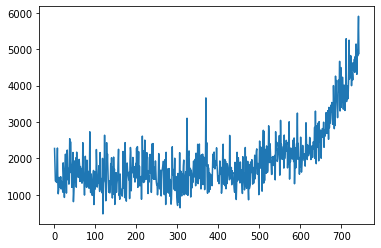

In [4]:
plt.plot(x,y)

(array([ 2., 10., 28., 53., 83., 91., 90., 75., 79., 57., 39., 23., 12.,
        15.,  7., 11.,  9.,  7.,  5.,  7.,  8.,  7.,  2.,  6.,  4.,  1.,
         2.,  1.,  0.,  1.]),
 array([ 472.        ,  653.13333333,  834.26666667, 1015.4       ,
        1196.53333333, 1377.66666667, 1558.8       , 1739.93333333,
        1921.06666667, 2102.2       , 2283.33333333, 2464.46666667,
        2645.6       , 2826.73333333, 3007.86666667, 3189.        ,
        3370.13333333, 3551.26666667, 3732.4       , 3913.53333333,
        4094.66666667, 4275.8       , 4456.93333333, 4638.06666667,
        4819.2       , 5000.33333333, 5181.46666667, 5362.6       ,
        5543.73333333, 5724.86666667, 5906.        ]),
 <a list of 30 Patch objects>)

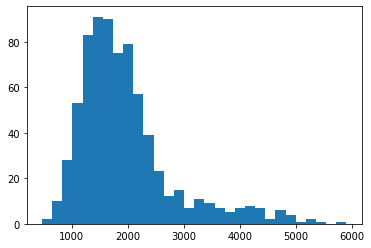

In [5]:
plt.hist(y, bins=30) # Histogram จำนวนคนเข้าไม่ค่อยสื่ออะไร

In [6]:
n = len(y) # length ของข้อมูล
mean_y = sum(y) / n # sum/length

In [7]:
mean_y

1962.1659863945579

In [8]:
m = len(x)
mean_x = sum(x) / m
deduct_x = x-mean_x
sqx = deduct_x**2
sumsqx = sum(sqx)
varx = sumsqx / (m-1)
sdx = varx**0.5

In [9]:
varx

45759.604563569286

In [10]:
sdx

213.9149470316866

In [11]:
deduct_y = y-mean_y
sqy = deduct_y**2
sumsqy = sum(sqy)
vary = sumsqy / (n-1)
sdy = vary**0.5

In [12]:
sdy

860.720996918468

In [13]:
skew_y = (sum((y-mean_y)**3)/(n-1))/(sdy**3) # กราฟเบ้ขวา เพราะ skew เป็นบวก
skew_y

1.6045398163589908

In [14]:
kurr_y = (sum((y-mean_y)**4)/(n-1))/(sdy**4) # kurtosis normal = 3 
kurr_y # อันนี้มากกว่า normal distubution -> สูงกว่านั่นเอง -> fat tail

5.868152435504887

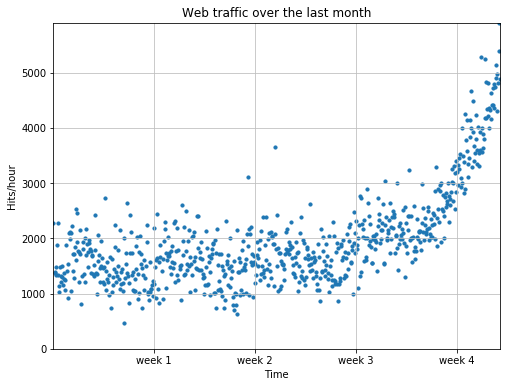

In [15]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)]) # แบ่งเวลาจาก ชม. เป็น week  HOMEWORK แบ่งกริดเป็น ปี แทน 

    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# first look at the data
plot_models(x, y, None, os.path.join(CHART_DIR, "lin1.png"))

In [16]:
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True) # polynomials degree 1 -> Linear Function
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1) # สิ่งที่ได้ model [b1 b0] error => var
f1

Model parameters of fp1: [  2.59619213 989.02487106]
Error of the model of fp1: [3.17389767e+08]


poly1d([  2.59619213, 989.02487106])

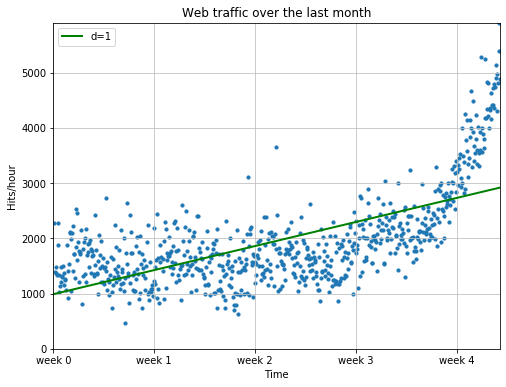

In [17]:
plot_models(x, y, [f1], os.path.join(CHART_DIR, "modelf1.png"))

Model parameters of fp2: [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Error of the model of fp2: [1.79983508e+08]


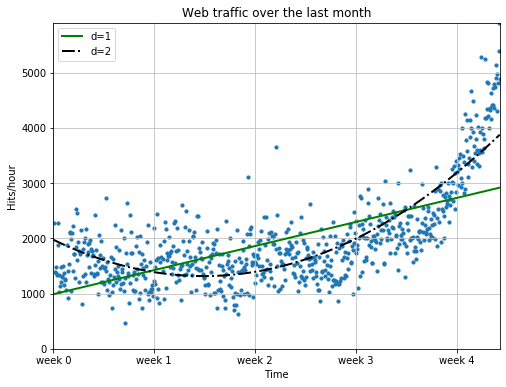

In [18]:
fp2, res2, rank2, sv2, rcond2 = sp.polyfit(x, y, 2, full=True) # polynomials degree 2
print("Model parameters of fp2: %s" % fp2)
print("Error of the model of fp2:", res2)
f2 = sp.poly1d(fp2)
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "3.png"))

Model parameters of fp3: [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
Error of the model of fp3: [1.39350144e+08]


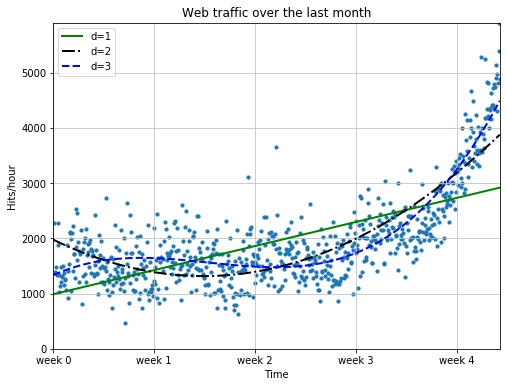

In [19]:
fp3, res3, rank3, sv3, rcond3 = sp.polyfit(x, y, 3, full=True) # polynomials degree 3
print("Model parameters of fp3: %s" % fp3)
print("Error of the model of fp3:", res3)
f3 = sp.poly1d(fp3)
plot_models(x, y, [f1, f2, f3], os.path.join(CHART_DIR, "model3.png"))

In [20]:
def error(f, x, y):  # def = define
    return sp.sum((f(x) - y) ** 2)  # sum(ความต่างระหว่างค่าจริงกับค่าพยากร ^2)  HOMEWORK หา MSA , RMSA (เปลี่ยน def)

print("Errors for the complete data set:")
for f in [f1, f2, f3]:  # loop f1 , f2 
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725


Model parameters of fa:  
0.8399 x + 1400
Error of the model of fa: [3.17389767e+08]
Model parameters of fb:  
21.17 x - 1.099e+04
Error of the model of fb: [3.17389767e+08]


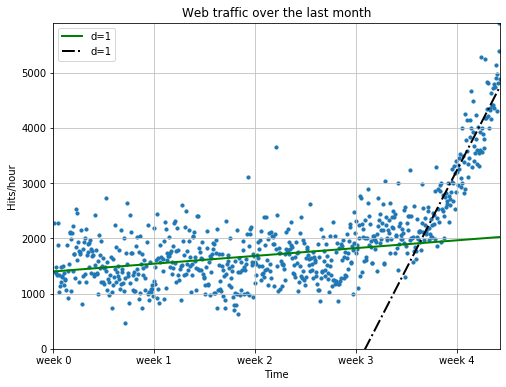

In [21]:
# fit and plot a model using the knowledge about inflection point
inflection = 3.5 * 7 * 24  # กำหนดจุดแบ่ง data ออกเป็น 2 ส่วน ที่คิดว่าเป็นจุดเปลี่ยน slope (เดาว่าวีคที่ 3.5)
inflection =int(inflection)  # ทำให้เป็น int
xa = x[:inflection]  # เอาข้อมูลก่อน inflection
ya = y[:inflection]  # เอาข้อมูลก่อน inflection
xb = x[inflection+1:]  # เอาข้อมูลหลัง inflection
yb = y[inflection+1:]  # เอาข้อมูลหลัง inflection

fa = sp.poly1d(sp.polyfit(xa, ya, 1))  # model ก่อน inflection
fb = sp.poly1d(sp.polyfit(xb, yb, 1))  # model หลัง inflection

print("Model parameters of fa: %s" % fa)
print("Error of the model of fa:", res1)

print("Model parameters of fb: %s" % fb)
print("Error of the model of fb:", res1)

plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "4.png"))

Model parameters of fa2:           2
0.004415 x - 1.805 x + 1666
Error of the model of fa: [3.17389767e+08]
Model parameters of fb2:          2
0.07819 x - 83.68 x + 2.402e+04
Error of the model of fb: [3.17389767e+08]


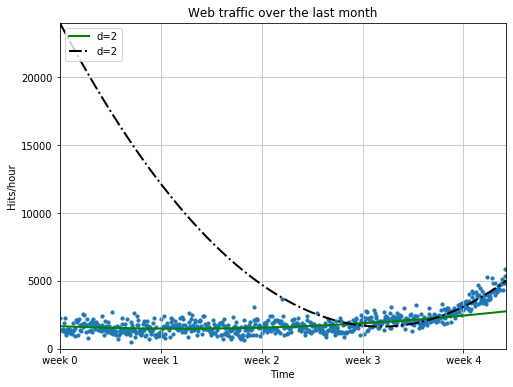

In [22]:
fa2 = sp.poly1d(sp.polyfit(xa, ya, 2))  # model ก่อน inflection
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))  # model หลัง inflection

print("Model parameters of fa2: %s" % fa2)
print("Error of the model of fa:", res1)

print("Model parameters of fb2: %s" % fb2)
print("Error of the model of fb:", res1)

plot_models(x, y, [fa2 , fb2], os.path.join(CHART_DIR, "lin2.png"))

In [23]:
def error(f, x, y):  # def = define
    return sp.sum((f(x) - y) ** 2)  # sum(ความต่างระหว่างค่าจริงกับค่าพยากร ^2)  HOMEWORK หา MSA , RMSA (เปลี่ยน def)

print("Errors for the complete data set:")
for f in [f1, f2]:  # loop f1 , f2 
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errors for only the time after inflection point")
for f in [fa, fb]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))  # error model A + error model B
#เห็นว่า error แบบตัดแล้วน้อยกว่า

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Errors for only the time after inflection point
Error d=1: 355087062.308852
Error d=1: 22015612.909589
Error inflection=132822019.999587
